In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
from locate.simulations.simulate import simulate_segment, simulate_data
from locate.simulations.utils_simulations import plot_simulations, create_data_input

In [3]:
purity = .99
coverage = 100
ploidy = 2

segs = simulate_segment(only_clonal = True, purity = purity, coverage = coverage, genome_size = 30000000, segments = 5)
snp,snv = simulate_data(segs)
data_input, snp, snv = create_data_input(snp, snv)

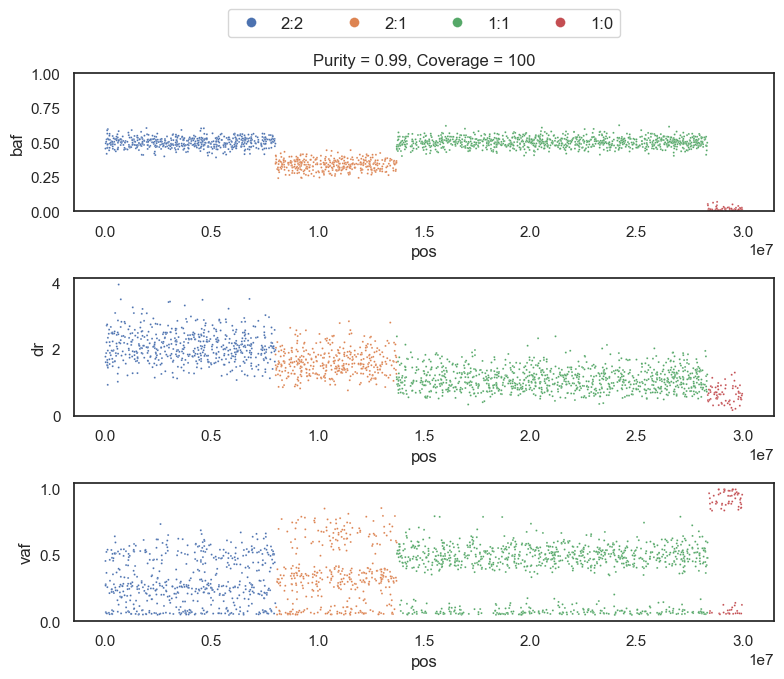

In [4]:
plot_simulations( snp, snv, purity, coverage)

In [5]:
snv = snv.sort_values('pos')
snp =  snp.sort_values('pos')

In [6]:
tmp_csv = '/Users/lucreziavaleriani/Desktop/tmp.csv'
test_df = pd.DataFrame({"vaf":snv.vaf, "baf":snp.baf, "dr":snp.dr, "pos":snv.pos, "cna_id":snv.CN_1})
test_df.to_csv(path_or_buf=tmp_csv, sep=",")

In [9]:
from locate.segmentation.multivariate_clasp import MultivariateClaSP
multiClasp = MultivariateClaSP(tmp_csv, 
                               mode='sum', 
                               out_dir='/Users/lucreziavaleriani/Desktop/sm/', 
                               threshold=1e-10, 
                               window_size=15,
                               cna_id = list(test_df.cna_id))
multiClasp.analyze_time_series()

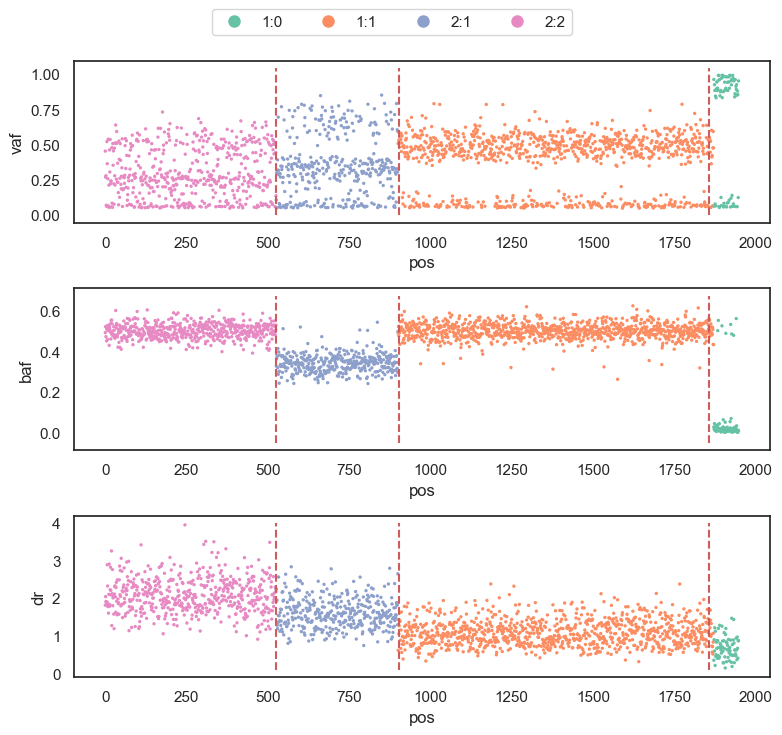

In [10]:
multiClasp.plot_results(save=False)